In [1]:
#%matplotlib inline     
# ^Sans animations
%matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

## Modèle 2 : Evolution du remplissage de la bibliothèque en fonction du temps

#### Multiples entrées et/ou sorties sur une journée avec les horaires d’ouvertures et un taux d’affluence d’entrée et de sortie.


Nous disposons des horaires et du nombre de place de la bibliothèque 

In [14]:
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque

def alea_entree(aff,afflim,p1):
    '''
    float->int
    en fonction du taux d'affluence et d'une probabilité ,retourne 1 si l'élève rentre, sinon 0.
    '''
    if aff>=afflim :
        u = np.random.random() # u est un nombre aléatoire entre 0 et 1
        if u < p1: 
            return 0
    return 1

In [3]:
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p2 : la probabilité que la personne ne sort pas de la bibliothèque

p2 =.95
def alea_sortie(aff,afflim,p2):
    '''
    float->int
    en fonction du taux d'affluence et d'une probabilité p2,retourne 1 si l'élève sort, sinon 0 0.
    '''
    if aff>=afflim :
        u = np.random.random()  # u est un nombre aléatoire entre 0 et 1
        if u < p2: 
            return 0
        else:
            return 1
    return 0

### Changement de format pour les jours de la semaine

In [15]:
def conversion1_jour(jour):
    ''' str -> int
        Conversion : str -> int pour les jours de la semaine '''
    Jour1 = {'lundi':0,'mardi':1,'mercredi':2,'jeudi':3,'vendredi':4,'samedi':5,'dimanche':6}
    return (Jour1[jour])

In [5]:
conversion1_jour("mardi")

1

### Fonction pour savoir si la bibliothèque est ouverte.

In [6]:
# Exemple : horaire pour la BDL
horaire = [(9,22) , (9,22) , (9,22) , (9,22) , (9,22) , (10,20),(0,0)]

def est_ouvert(heure,jour,horaire):
    '''float * str * dict[tuple] -> bool
    indique si la bibliotheque est ouverte ou fermée en fonction de l'heure actuelle 'heure', 
    du jour de la semaine 'jour' et des horaires d'ouverture 'horaire'  '''
    j = conversion1_jour(jour)
    date = horaire[j]
    if date!= (0,0):
        ouverture = date[0]
        fermeture = date[1]
        return ouverture <= heure < fermeture
    return False

In [42]:
# Exemple : On teste si la bibliothèque est ouverte le lundi à 11h.
print( est_ouvert(22,'lundi',horaire) )

False


### Nouvelle modélisation en tenant compte du paramètre horaire.
De plus, nous introduirons trois nouvelles fonctions : nb_entre, nb_sortie et aff_actu.


In [8]:
#tirage aléatoire du nombre d'entrée

# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
#emax : nombre de place restant
#t: heure actuelle
#nb: nombre de tirage
# s: nombre de personnes qui entrent
# phase : découpage de la journée en plusieurs phases

def nb_entre(aff,afflim,p1,emax):
    s=0
    nb= 150
    nb=np.random.randint(0,nb)
    if nb>emax:
        nb = emax
    for i in range(nb):
        s += alea_entree(aff,afflim,p1)
    return s


In [9]:
#idem que pour nb_entre

def nb_sortie(aff,afflim,p2,bt):
    s=0
    nb= 1500
    nb=np.random.randint(0,nb)
    if nb>bt:
        nb = bt 
        
    for i in range(nb):
        s += alea_sortie(aff,afflim,p2)
    return s


### Bibliothèquetemp fait des entrées/sorties en fonction des horaires d'ouverture de la bibliothèque

In [65]:

# Bibliothèquetemp permet  en fonction des horaires d'ouverture de la bibliothèque
# et de l'heure de la journée de faire des entrée/sortie multiple.

#bt0: nombre initial de personne dans la bibliothèque. 
# bt : nombre de personne dans la bibliothèque à l'instant t
#btmax: nombre de places de la bibliothèque.
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
# p2 : la probabilité que la personne ne sort pas de la bibliothèque
# On fera un cycle de 24h

# Exemple : horaire pour la BDL
horaire = [(9,22) , (9,22) , (9,22) , (9,22) , (9,22) , (10,20),(0,0)]

def bibliothèquetemp(bt0,btmax,afflim,p1,p2,jour):
                    #(int,int,float,float,float,int)
    ''' hyp : bt0 <= bt'''
    bt=bt0
    aff=bt/btmax
    L=[bt0]
    for t in range(24):
        if est_ouvert(t,jour,horaire):
            emax = btmax-bt
            a = nb_entre(aff,afflim,p1,emax)
            b = nb_sortie(aff,afflim,p2,bt)
            if bt < btmax:
                bt += a
            if bt>0:
                bt-=b
        else:
            bt=0
        L.append(bt)
        aff=bt/btmax
    return L
    
    


In [60]:
print(bibliothèquetemp(0,745,.8,.9,.95,'mardi'))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 133, 268, 404, 552, 651, 652, 648, 651, 620, 606, 613, 586, 0]


### affichons la courbe

Paramètres de la fonction : t0,btmax,afflim,p1,p2,n

<IPython.core.display.Javascript object>


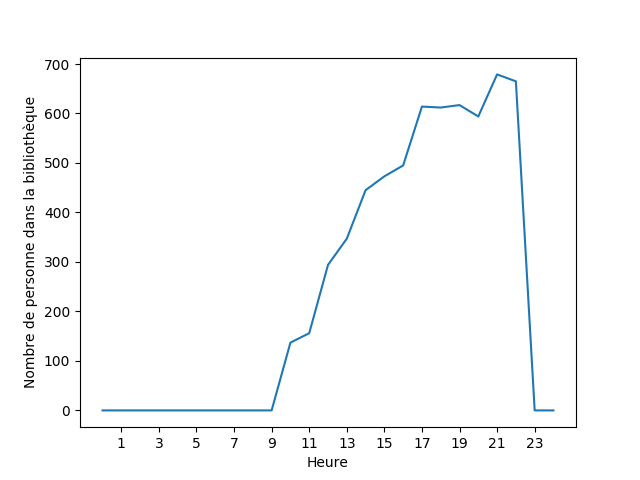

In [67]:
def plotb0(L):
    plt.figure()
    plt.plot(L)
    plt.ylabel("Nombre de personne dans la bibliothèque")
    plt.xlabel("Heure")
    plt.xticks([i for i in range(1,25,2)])
    plt.show()
    return
plotb0(bibliothèquetemp(0,745,.8,.9,.95,'mardi'))

### Nous observons aux horaires de fermeture l'absence de personne.

***A 18h, le nombre de personne atteint son maximum, puis décroît à cause de p1 (l'élève hésite à entrer) et p2 
(l'élève hésite à rester).***

### Nous avons collecté les affluences de la bibliothèque des licences pour une semaine.
Avec notre modèle, nous allons essayer de retrouver ces données.

In [22]:
#affluence selon l'heure et le jour. Toutes les listes ont le même nombre d'éléments.
#On comble les trous s'il y en a.(samedi)

semaine = {'lundi' : [0.17, 0.33, 0.42, 0.5, 0.58, 0.58, 0.67, 0.75, 0.83, 0.92, 0.75, 0.5, 0.25] , 
 'mardi' : [0.08, 0.17, 0.25, 0.33, 0.42, 0.42, 0.42, 0.5, 0.58, 0.58, 0.5, 0.33, 0.17] , 
 'mercredi' : [0.17, 0.33, 0.42, 0.5, 0.5, 0.5, 0.58, 0.58, 0.58, 0.5, 0.33, 0.25, 0.08] ,
 'jeudi' : [0.08, 0.17, 0.25, 0.33, 0.5, 0.58, 0.5, 0.5, 0.67, 0.75, 0.67, 0.42, 0.17] , 
 'vendredi' : [0.08, 0.25, 0.5, 0.58, 0.67, 0.83, 0.83, 0.67, 0.67, 0.67, 0.67, 0.42, 0.17] , 
 'samedi' : [0,0.25, 0.75, 0.58, 0.75, 0.92, 0.83, 0.83, 1.0, 0.75, 0.25,0,0] }

In [23]:
def aff_actu(heure,jour):
    ''' float * str -> float
        retourne l'affluence actuelle à une heure donnée dans une bibliothèque
        Si la bibliothèque est fermée retourne 0'''
    if est_ouvert(heure,jour,horaire):
        x=semaine[jour][int(heure-9)]
        return x
    return 0
aff_actu(10,"samedi")

0.25